# Analysis

In this notebook we will analyse the models that we created.

The analysis consists of:

1) comparing the perplexity and the accuracy between the rationalized and non-rationalized model 

2) Checking the change in perplexity when removing even more from the rational

3) Checking the distribution of rationals

4) Qualitative analysis of the some examples

## Setup

In [1]:
#First we fix the relative imports
import os
import sys
# M
# module_path = os.path.abspath(os.path.join('..'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
#Make sure we are in the top folder. 
os.chdir(os.path.join('..'))

In [2]:
### We load the models based on the configs for analysis. 
from utils.analysis import parse_config_for_analysis
config_path = 'configs/simple_RE_config.yml'

loaded_info = parse_config_for_analysis(config_path)


C:\Users\gerso\projects\rational-dialog-model\utils\analysis.py:22: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


./daily_dialog/tokenizer.json


Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
Using custom data configuration default
Reusing dataset daily_dialog (C:\Users\gerso\.cache\huggingface\datasets\daily_dialog\default\1.0.0\c03444008e9508b8b76f1f6793742d37d5e5f83364f8d573c2747bff435ea55c)
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


load pretrained_model:  ./models/small_lm_test.pt
load pretrained_model:  ./models/small_lm_test_rationalized.pt
2


## Perplexity and Accuracy

In [3]:
lm_RE = loaded_info["lightning_language_model_RE"].to("cpu")
lm = loaded_info["lightning_language_model_no_RE"].to("cpu")
tokenizer = loaded_info["tokenizer"]
dataloader_test = loaded_info["dataloader_test"]

In [15]:
### First thing we compare the perplexity and accuracy on the testset.
from utils.analysis import get_results, get_results_RE


lm_RE_result = get_results_RE(lm_RE, dataloader_test, 5)
lm_result = get_results(lm, dataloader_test)
print(lm_RE_result)
print(lm_result)


  0%|                                                                                            | 0/6 [00:00<?, ?it/s]C:\Users\gerso\anaconda3\envs\CDM\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00,  6.84it/s]


{'mean_acc': {'mean': 0.2596055090427399, 'std': 0.0016445391817572544}, 'mean_perplexity': {'mean': 79.28618621826172, 'std': 0.17761544988410205}, 'mean_mask_percentage': {'mean': 0.20323391854763032, 'std': 0.007099964896639152}}
{'mean_acc': tensor(0.3269), 'mean_perplexity': tensor(38.6099, grad_fn=<AddBackward0>), 'mean_mask_percentage': 0}


## Change in perplexity

In [14]:
### Next we test what happens if we check te change in perplexity of the RE. 
from utils.analysis import calc_change_in_perplexity_experiment
change_in_perplexity = calc_change_in_perplexity_experiment(lm_RE, dataloader_test, n_experiments=10, n_extra_mask=1)
change_in_perplexity

{'mean_diff_perplexity': {'mean': -0.004987716861069203,
  'std': 0.14574273124017967}}

## Distribution of mask

In [6]:
from utils.analysis import rational_analysis

rational_distributions = rational_analysis(lm_RE, dataloader_test)
print(rational_distributions)

{'abs_average': tensor(43.5493), 'rel_average': tensor(0.4765), 'abs_pos_count': Counter({0.0: 2021, 2.0: 159, 9.0: 157, 10.0: 156, 1.0: 154, 8.0: 153, 12.0: 153, 4.0: 153, 6.0: 152, 3.0: 151, 20.0: 150, 21.0: 150, 15.0: 150, 22.0: 149, 11.0: 149, 7.0: 149, 23.0: 149, 13.0: 148, 16.0: 148, 17.0: 147, 14.0: 147, 24.0: 146, 19.0: 146, 18.0: 146, 25.0: 145, 27.0: 144, 5.0: 144, 28.0: 139, 26.0: 138, 34.0: 126, 29.0: 126, 40.0: 123, 38.0: 123, 35.0: 123, 33.0: 122, 32.0: 121, 30.0: 121, 41.0: 120, 31.0: 119, 36.0: 118, 45.0: 116, 43.0: 116, 44.0: 115, 39.0: 115, 37.0: 115, 42.0: 114, 46.0: 111, 49.0: 98, 47.0: 98, 51.0: 96, 70.0: 95, 52.0: 95, 53.0: 95, 60.0: 93, 55.0: 92, 69.0: 91, 63.0: 91, 56.0: 91, 54.0: 91, 48.0: 91, 62.0: 90, 57.0: 90, 66.0: 89, 61.0: 89, 50.0: 89, 58.0: 89, 64.0: 88, 71.0: 86, 75.0: 86, 59.0: 86, 76.0: 85, 73.0: 85, 68.0: 85, 72.0: 85, 67.0: 84, 65.0: 84, 74.0: 78, 83.0: 64, 81.0: 64, 78.0: 64, 77.0: 64, 89.0: 63, 79.0: 63, 96.0: 61, 86.0: 60, 82.0: 60, 91.0: 60, 84

<BarContainer object of 11 artists>

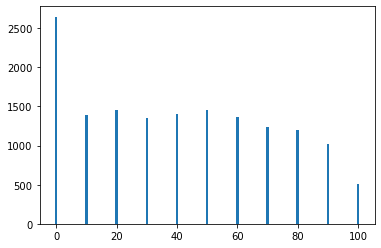

In [7]:
import matplotlib.pyplot as plt
relative_counts = rational_distributions["rel_pos_count"]
plt.bar(relative_counts.keys(),relative_counts.values())

<BarContainer object of 198 artists>

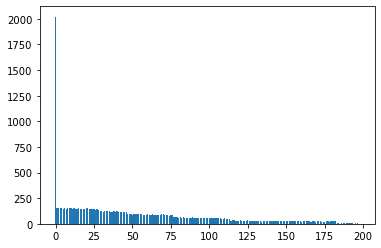

In [8]:
abs_pos_count = rational_distributions["abs_pos_count"]
plt.bar(abs_pos_count.keys(),abs_pos_count.values())

## Analysing some examples

In [9]:
examples = ["How are you doing?", "What did you do today?", "How's work?", "Would you like some coffee?"]

In [10]:
## First with greedy rationals
completed_dialogues_chance = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=False)
completed_dialogues_greedy = lm_RE.complete_dialogues(examples, total_length=40, greedy_rationals=True)

In [11]:
from utils.analysis import pretty_print_completed_dialogues

In [12]:
pretty_print_completed_dialogues(completed_dialogues_greedy)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' d like to make a call next time
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> i ' m going in the evening . here you
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> it ’ s $ 50 to 18 .
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> what about the weather on a tim ? [SEP]
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> yes , i ' d like to have a room
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> oh , what a great guy ! [SEP] what are
[MASK] [MA

In [13]:
pretty_print_completed_dialogues(completed_dialogues_chance)

context ----> response
[MASK] [MASK] [MASK] [MASK] [MASK] ------> how long have you been a long leader ?
[MASK] [MASK] you [MASK] [MASK] [MASK] long [MASK] [MASK] [MASK] [MASK] [MASK] [MASK]der [MASK] ------> how long would you recommend ? [SEP] i ’ d
[MASK] [MASK] you [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> how can i do that ? [SEP] i ' m
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] long [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] m ------> mm . [SEP] what ? [SEP] it doesn ' t
[MASK] [MASK] [MASK] [MASK] [MASK] [MASK] ------> yes , i have an appif porder
what [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK] [MASK]der ------> ! are you kidding ? [SEP] no , not yet
[MASK] [MASK] [MASK] 